EDA of Loan Prediction

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Data Loading

df_train=pd.read_csv("E:\\ML\\Project\\artifacts\\training_set.csv")
df_test=pd.read_csv("E:\\ML\\Project\\artifacts\\testing_set.csv")

In [44]:
# Data Description

print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


In [45]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [47]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

In [48]:
df_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area'],
      dtype='object')

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [51]:
#sapareting categorical and numerical values in training data
cat_val=[fea for fea in df_train.columns if df_train[fea].dtypes=="O"]
num_val=[fea for fea in df_train.columns if df_train[fea].dtypes!="O"]

print("Categorical variables : ",cat_val)
print("Numerical variables : ",num_val)

Categorical variables :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area', 'Loan_Status']
Numerical variables :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [52]:
#sapareting categorical and numerical values in testing data
cat_val1=[fea for fea in df_test.columns if df_test[fea].dtypes=="O"]
num_val1=[fea for fea in df_test.columns if df_test[fea].dtypes!="O"]

print("Categorical variables : ",cat_val1)
print("Numerical variables : ",num_val1)

Categorical variables :  ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area']
Numerical variables :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [60]:
# Training Dataset

for i in range(1,len(cat_val)):


    print(df_train[cat_val[i]].value_counts())
    

Male      487
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        479
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64


In [62]:
# Testing Dataset

for i in range(1,len(cat_val1)):


    print(df_test[cat_val1[i]].value_counts())
    

Male      286
Female     70
Name: Gender, dtype: int64
Yes    233
No     134
Name: Married, dtype: int64
0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64
Graduate        283
Not Graduate     84
Name: Education, dtype: int64
No     307
Yes     37
Name: Self_Employed, dtype: int64
Urban        140
Semiurban    116
Rural        111
Name: property_Area, dtype: int64


Numerical Variables

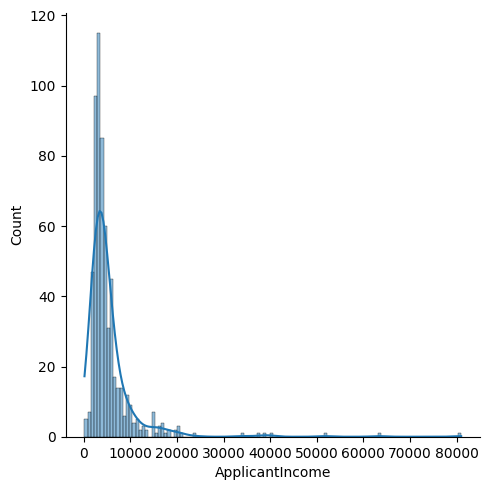

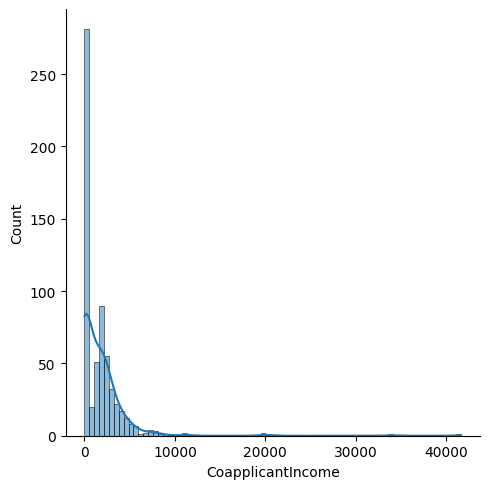

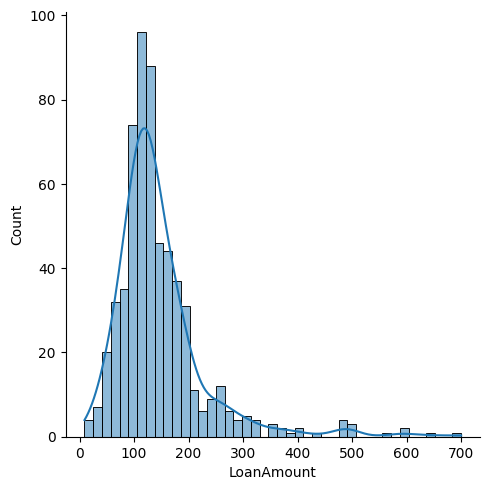

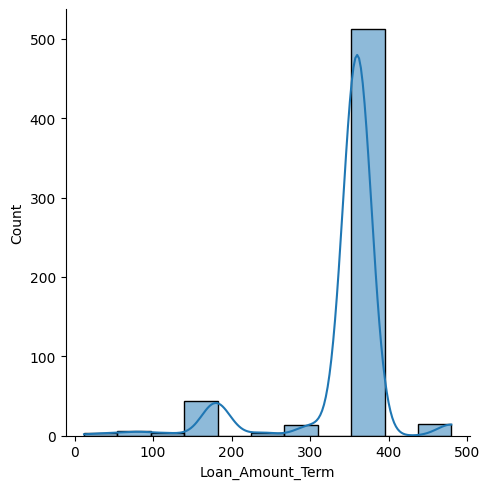

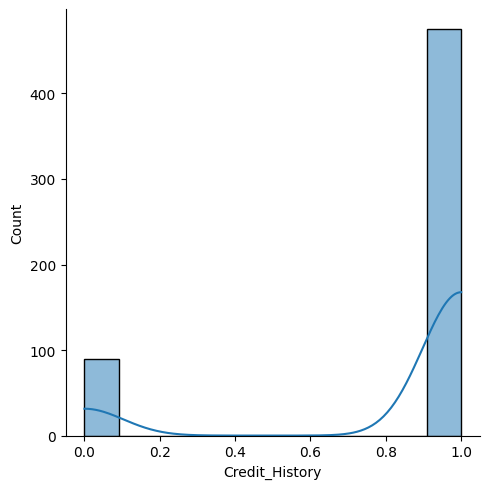

In [63]:
#Training Dataset
for i in num_val:

    sns.displot(df_train[i],kde=True)
    plt.show()

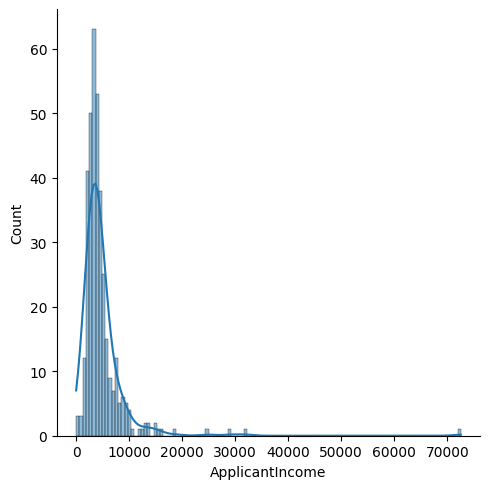

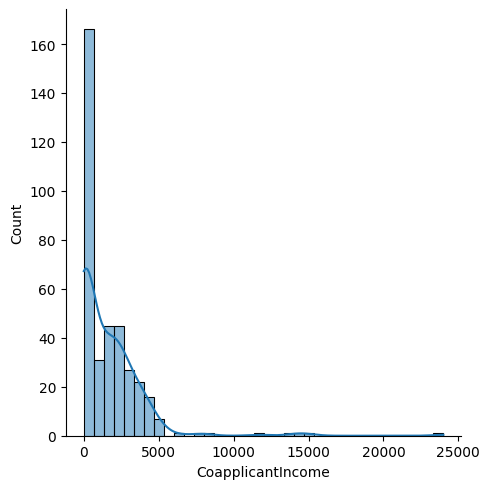

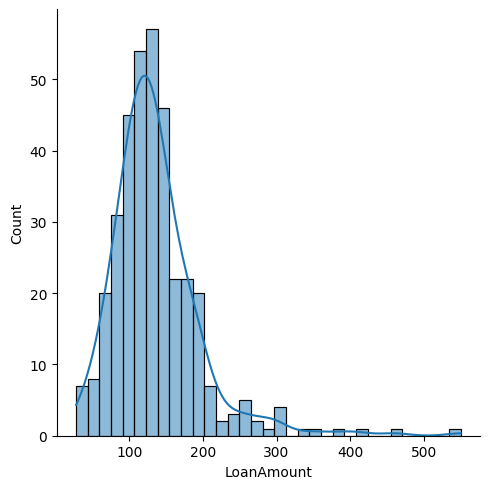

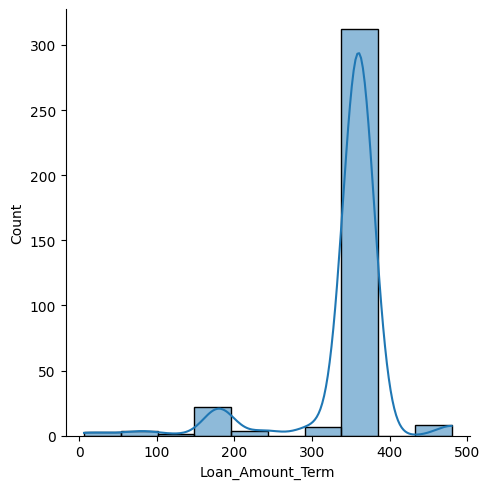

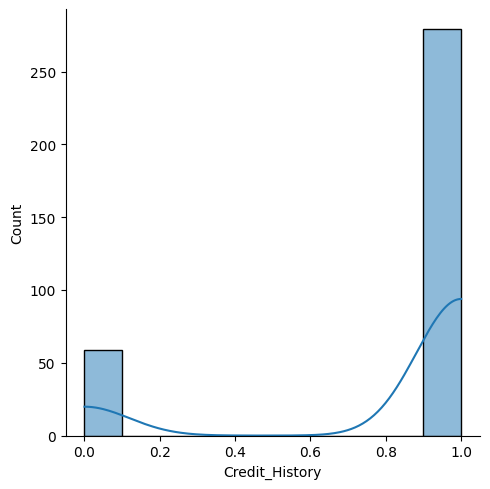

In [65]:
#Testing Dataset
for i in num_val1:

    sns.displot(df_test[i],kde=True)
    plt.show()

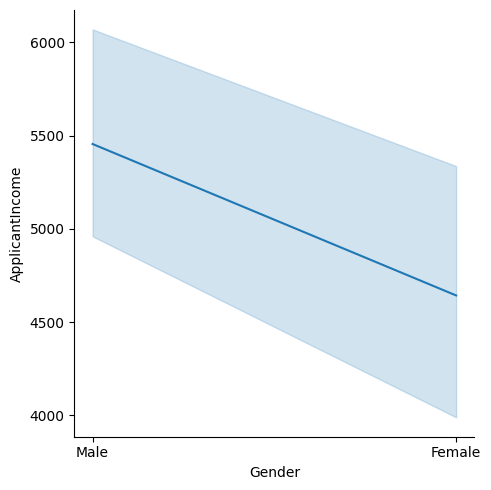

In [70]:
sns.relplot(x='Gender',y='ApplicantIncome',data=df_train,kind='line')
plt.show()

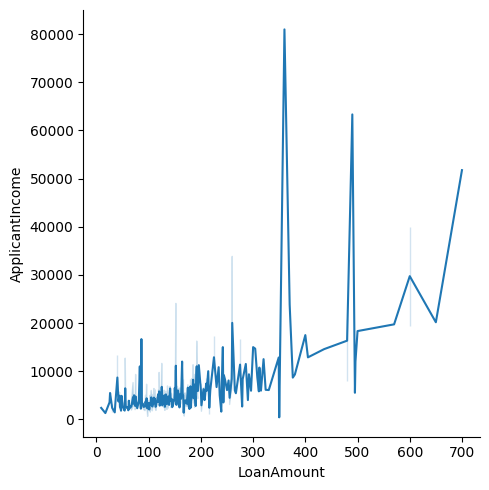

In [71]:
sns.relplot(x='LoanAmount',y='ApplicantIncome',data=df_train,kind='line')
plt.show()

In [72]:
corr_mat=df_train.cov()
corr_mat

C:\Users\dell\AppData\Local\Temp\ipykernel_11924\2287339469.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat=df_train.cov()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,3.744111e+07,-2.095075e+06,302172.884708,-18228.027764,-33.396601
CoapplicantIncome,-2.095075e+06,8.576843e+06,48002.878647,-11529.675487,-1.944881
LoanAmount,3.021729e+05,4.800288e+04,7325.190241,222.894173,-0.255510
Loan_Amount_Term,-1.822803e+04,-1.152968e+04,222.894173,4240.667780,0.034019
Credit_History,-3.339660e+01,-1.944881e+00,-0.255510,0.034019,0.133136


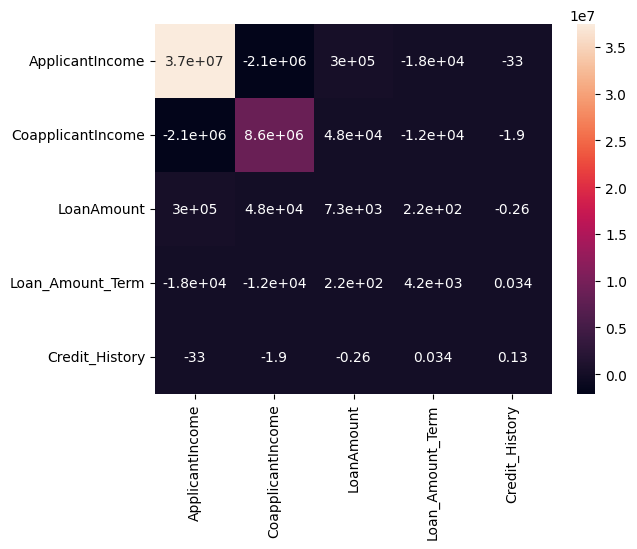

In [73]:
sns.heatmap(corr_mat,annot=True)
plt.show()

Categorical Variables

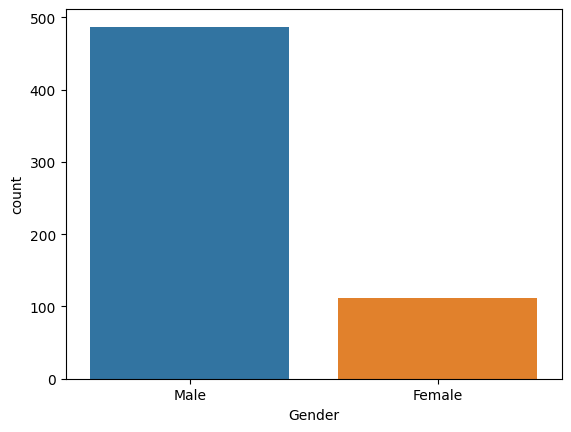

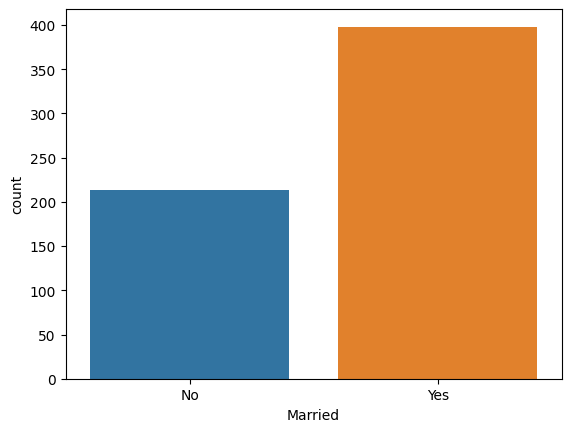

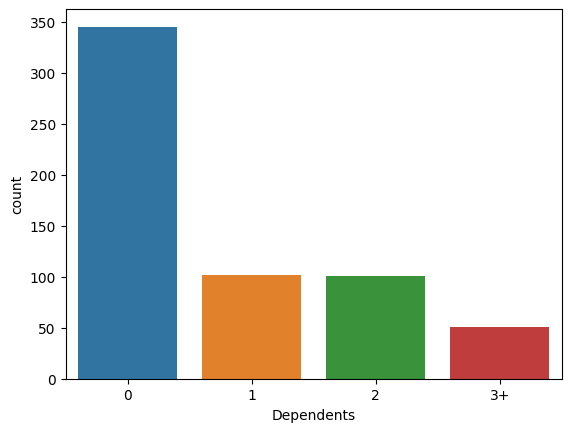

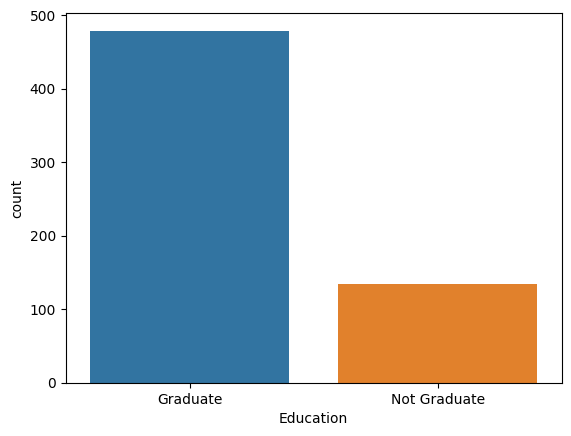

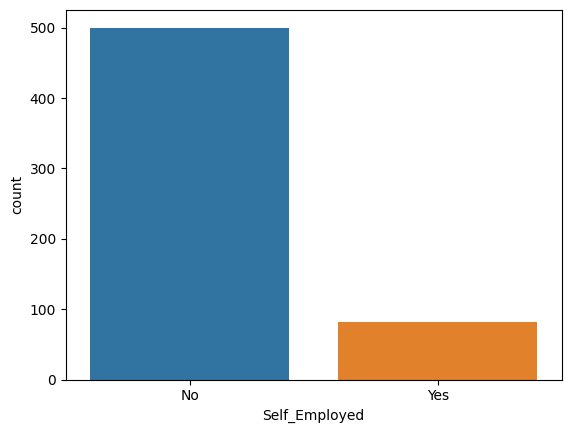

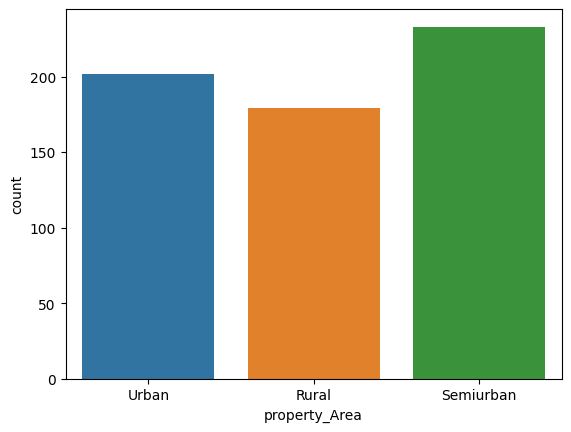

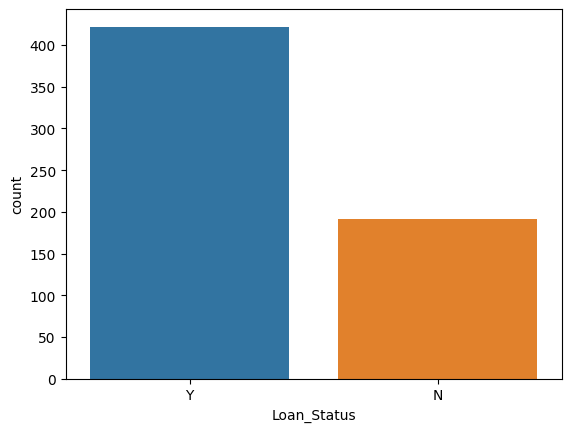

In [78]:
for i in range(1,len(cat_val)):
    
    sns.countplot(x=cat_val[i],data=df_train)
    plt.show()

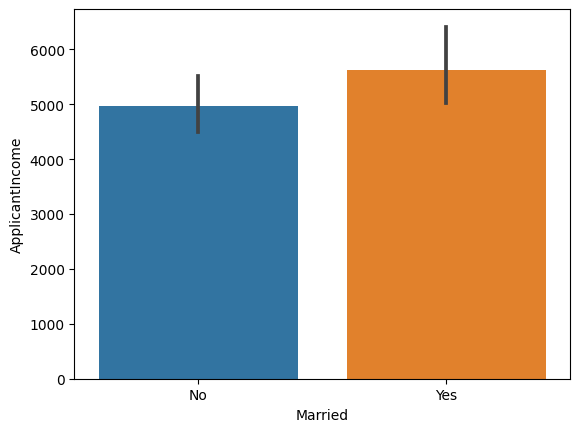

In [80]:
sns.barplot(x="Married",y="ApplicantIncome",data=df_train)  # Y asix values mean
plt.show()